In [1]:
# %load poi_id.py
#!/usr/bin/python

import sys
import pickle
import pandas as pd
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit


### Explore the data, then select the features to be used in this study.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)



### Data Exploration

In [2]:
#How many people (data points) are in this dataset? 
print 'number of data points:', len(data_dict)


#How many people in this dataset are Person's of Interest? 
num_POI = 0
for name in data_dict:
    if data_dict[name]["poi"] == True:
        num_POI += 1

print 'number of POI:', num_POI


#How many features are we provided for each person? 
###Opening the document, "final_project_dataset.pkl",
###the key for the first data point in the dictionary is 'METTS MARK'
print 'number of features for each person:', len(data_dict["METTS MARK"])


#Are there any features with missing values? 
###First, we get a list of all features names
feature_names = []
for feature in data_dict["METTS MARK"]:
    feature_names.append(feature)

###Now, we identify the number and percent of missing values in each feature
total_missing_feature = [] #number of missing values in each feature
perc_missing_feature = [] #percent of missing values in each feature
for feature in feature_names:
    num_missing_val = 0
    for name in data_dict:
        if data_dict[name][feature] == 'NaN':
            num_missing_val += 1
    total_missing_feature.append(num_missing_val)
    
    perc_missing = round(num_missing_val*100/len(data_dict),1)
    perc_missing_feature.append(perc_missing)

missing_df = pd.DataFrame({
    'Feature': feature_names,
    'Num_Missing_Values': total_missing_feature,
    'Percent_Missing': perc_missing_feature})

missing_df = missing_df.sort_values(by=['Percent_Missing'], ascending = False)
missing_df.reset_index(inplace = True)
missing_df.drop(labels = ['index'], axis = 1, inplace = True)
missing_df

number of data points: 146
number of POI: 18
number of features for each person: 21


,Feature,Num_Missing_Values,Percent_Missing
0,loan_advances,142,97.0
1,director_fees,129,88.0
2,restricted_stock_deferred,128,87.0
3,deferral_payments,107,73.0
4,deferred_income,97,66.0
5,long_term_incentive,80,54.0
6,bonus,64,43.0
7,from_poi_to_this_person,60,41.0
8,shared_receipt_with_poi,60,41.0
9,from_this_person_to_poi,60,41.0


### Outlier Investigation

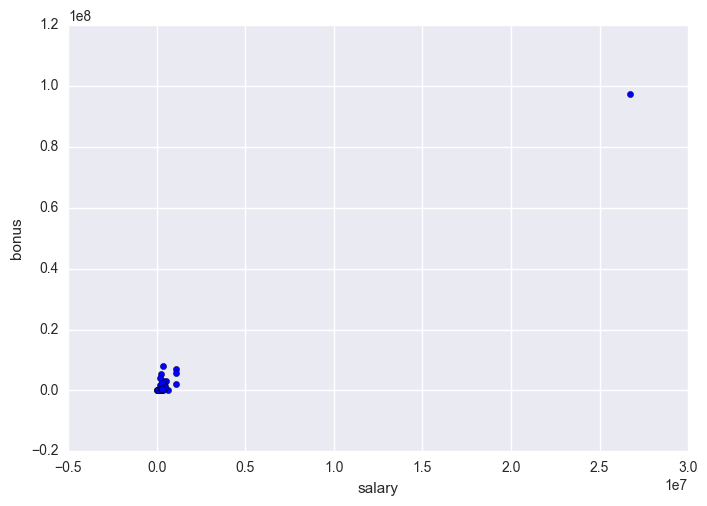

In [3]:
#Are there any outliers within the available financial dataset? 

###To answer this question, let's create a scatter plot of
###the 'salary' and 'bonus' features

import matplotlib.pyplot as plt
# from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

features = ["salary", "bonus"]
data = featureFormat(data_dict, features) #reads in the "data" in dictionary form. Then
                                          #converts it into an sklearn-ready numpy array.
                                          #As defined in the above line, the features 
                                          #being extracted from the dictionary are 
                                          #"salary" and "bonus"

for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")

plt.savefig('outlier.png')
plt.show()

In [4]:
###Now, we can identify the data point that is an outlier
###This salary is the only one above 20000000

for point in data:
    if point[0] > 20000000:
        salary_outlier = point[0]
        
        
for name in data_dict:
    if data_dict[name]["salary"] == salary_outlier:
        outlier_salary_recipient = name

print "main outlier to be removed:", outlier_salary_recipient

main outlier to be removed: TOTAL


In [5]:
###On visually inspecting the file "enron61702insiderpay.pdf" to 
###see the key, 'TOTAL', I noticed that there is another key 
###separated from the names of individuals. This key is
###'THE TRAVEL AGENCY IN THE PARK'. I will be removing it because
### it is a company, and not a person. 

data_dict.pop('TOTAL')
data_dict.pop('THE TRAVEL AGENCY IN THE PARK')

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

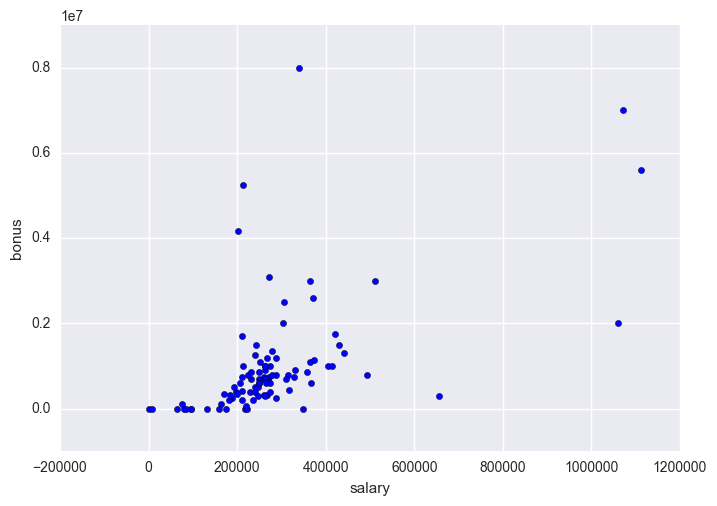

In [6]:
###Let's see if there are any other outliers that
###need to be investigated
features = ["salary", "bonus"]
data = featureFormat(data_dict, features) #reads in the "data" in dictionary form. Then
                                          #converts it into an sklearn-ready numpy array.
                                          #As defined in the above line, the features 
                                          #being extracted from the dictionary are 
                                          #"salary" and "bonus"

for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()

###The plot shows that there is no outlier so 
###huge that it must be removed

In [7]:
#In this study, we choose data points (people) from mixed sources.
#There are people who we only have email information for, others
#which we only have financial information for, and some for which we
#have inputs from both datasets. 
#However, looking through "enron61702insiderpay.pdf",
#lots of people (data points) in the financial dataset have missing
#values for several features. 

#Are there people missing all inputs for all financial features?
#If yes, do we have any email information for them? If we don't, 
#then we are missing both financial and email data for these people.
#They provide no information for this study, and can be removed

feature_financial = ['salary', 'deferral_payments', 'total_payments', 'loan_advances','bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] 
datapoints_nodata = []
for name in data_dict:
    ctr = 0
    for feature in feature_financial:
        if data_dict[name][feature] == 'NaN':
            ctr += 1
    if ctr == len(feature_financial):
        datapoints_nodata.append(name)

print "data point with no entries:", datapoints_nodata

data point with no entries: ['LOCKHART EUGENE E']


In [8]:
###There is only one person who has no financial data, 'LOCKHART EUGENE E'.
###Let's see if we have email information for him
data_dict['LOCKHART EUGENE E']['email_address']

'NaN'

In [9]:
###We have no email, or financial data for 'LOCKHART EUGENE E'
###We can remove him from the study
data_dict.pop('LOCKHART EUGENE E')

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 'NaN',
 'total_stock_value': 'NaN'}

### Manual feature removal

In [10]:
#The goal here is to identify features with higher percent
#of missing values in POI than Non-POI., I will not
#include these features in the study. 
#See write up to understand why

from __future__ import division

perc_POIftr_missing = [] #list will contain the percentage of missing values of each feature for POIs
perc_nonPOIftr_missing = [] #list will contain the percentage of missing values of each feature for nonPOIs

for feature in feature_names:
    ctr_POI_missing = 0
    ctr_nonPOI_missing = 0
    for name in data_dict:
        if data_dict[name]['poi'] == True and data_dict[name][feature] == 'NaN':
            ctr_POI_missing += 1
        elif data_dict[name]['poi'] == False and data_dict[name][feature] == 'NaN':
            ctr_nonPOI_missing += 1
            
    perc_POI_missing = round(ctr_POI_missing/num_POI*100, 1)
    perc_POIftr_missing.append(perc_POI_missing)
    
    perc_nonPOI_missing = round(ctr_nonPOI_missing/(len(data_dict) - num_POI)*100, 1)
    perc_nonPOIftr_missing.append(perc_nonPOI_missing)

In [11]:
perc_POIftr_missing = pd.Series(perc_POIftr_missing)
perc_nonPOIftr_missing = pd.Series(perc_nonPOIftr_missing)
missing_difference = perc_POIftr_missing - perc_nonPOIftr_missing

missing_discrepancy = pd.DataFrame({
    'Feature': feature_names,
    'POI_Percent_Missing': perc_POIftr_missing,
    'nonPOI_Percent_Missing': perc_nonPOIftr_missing,
    'Difference': missing_difference})

missing_discrepancy = missing_discrepancy[['Feature', 'POI_Percent_Missing', 'nonPOI_Percent_Missing', 'Difference']]

missing_discrepancy = missing_discrepancy.sort_values(by = 'Difference', ascending = False)

missing_discrepancy.reset_index(inplace = True)
missing_discrepancy.drop(labels = ['index'], axis = 1, inplace = True)
missing_discrepancy

,Feature,POI_Percent_Missing,nonPOI_Percent_Missing,Difference
0,restricted_stock_deferred,100.0,86.4,13.6
1,director_fees,100.0,87.2,12.8
2,exercised_stock_options,33.3,28.8,4.5
3,poi,0.0,0.0,0.0
4,deferral_payments,72.2,73.6,-1.4
5,loan_advances,94.4,98.4,-4.0
6,total_stock_value,0.0,14.4,-14.4
7,total_payments,0.0,16.0,-16.0
8,shared_receipt_with_poi,22.2,42.4,-20.2
9,to_messages,22.2,42.4,-20.2


### Create New Features

In [12]:
### Task 3: Create new feature(s)

#create function that will compute fractions
def computeFraction(poi_messages, all_messages):
    '''
    given a number messages to/from POI (numerator) 
        and number of all messages to/from a person (denominator),
        return the fraction of messages to/from that person
        that are from/to a POI
    '''
    if poi_messages == "NaN" or all_messages == "NaN":
        fraction = 0
    else:
        fraction = poi_messages/all_messages
    

    return fraction


for name in data_dict:
    
    data_point = data_dict[name]

    data_point["frac_from_poi"] = computeFraction(data_point["from_poi_to_this_person"], data_point["to_messages"])
    data_point["frac_to_poi"] = computeFraction(data_point["from_this_person_to_poi"], data_point["from_messages"])
    data_point["frac_shared_with_poi"] = computeFraction(data_point["shared_receipt_with_poi"], data_point["to_messages"])

### Select Important Features

In [13]:
#update the list of features

ftr2exclude = ['restricted_stock_deferred', 'director_fees', 'total_payments', 'total_stock_value', 'email_address' ]
                                                                        #features to exclude based on human intuition

features_list = ['poi'] #list must begin with 'poi'
all_features = data_dict["METTS MARK"].keys()

for feature in all_features:
    if feature != 'poi' and feature not in ftr2exclude:
        features_list.append(feature)
        
print "features used for this study:", features_list

features used for this study: ['poi', 'to_messages', 'frac_from_poi', 'deferral_payments', 'frac_shared_with_poi', 'expenses', 'deferred_income', 'long_term_incentive', 'shared_receipt_with_poi', 'loan_advances', 'from_messages', 'other', 'bonus', 'from_poi_to_this_person', 'from_this_person_to_poi', 'restricted_stock', 'salary', 'exercised_stock_options', 'frac_to_poi']


In [14]:
### Extract features and labels from dataset for local testing

data = featureFormat(data_dict, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)


### Employ selectKBest to identify the most important features
from sklearn.feature_selection import SelectKBest, f_classif

k = 4 #we want only the 4 best features 
selector = SelectKBest(f_classif, k = k)
features = selector.fit_transform(features, labels)
scores = selector.scores_

imprtnc = pd.DataFrame({'feature': features_list[1:],
                       'score': scores})

imprtnc.sort_values(by = 'score', ascending = False, inplace = True)
imprtnc.reset_index(inplace = True)
imprtnc.drop(labels = ['index'], axis = 1, inplace = True)
imprtnc

,feature,score
0,exercised_stock_options,24.532722
1,bonus,20.524645
2,salary,18.003740
3,frac_to_poi,16.177891
4,deferred_income,11.321487
5,long_term_incentive,9.772104
6,restricted_stock,9.079077
7,frac_shared_with_poi,8.906579
8,shared_receipt_with_poi,8.432635
9,loan_advances,7.125382


### Cross-Validation, Pick and Tune an Algorithm

In [19]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

#set up cross-validator
#selected random_state = 42 to match the lecturer
#defined cross-validator in tester.py
n_folds = 4.
skf = StratifiedKFold(labels, n_folds = n_folds, shuffle = True, random_state = 42)

#set up parameters to be tuned, and chosen algorithm
parameters_1 = {'n_neighbors':[3, 5, 7, 9], 
             'weights': ('uniform', 'distance'),
             'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute')}
neigh = KNeighborsClassifier()


#create empty lists to append information that
#will be collected from the testing of each bin
precisions = []
recalls = []
f1s = []
accuracies = []
best_parameters = []

#pull the indices for each round of testing
#all other indices in the same round are for training
for train_idx, test_idx in skf: 
    
    #create empty lists to append the data
    #required for testing and training
    features_train = []
    features_test  = []
    labels_train   = []
    labels_test    = []
        
        
    for ii in train_idx:
        features_train.append( features[ii] )
        labels_train.append( labels[ii] )
    for jj in test_idx:
        features_test.append( features[jj] )
        labels_test.append( labels[jj] )
            
    #Apply GridSearchCV to identify the best parameters
    #for the selected Classifier, based on highest f1 score
    clf_1 = GridSearchCV(neigh, parameters_1, scoring = 'f1')
    
    #Fit the classifier to the data, and make predictions
    clf_1.fit(features_train, labels_train)
    pred_1 = clf_1.predict(features_test)
    
    #Pull the performance values that will for the testing of
    #each bin
    precisions.append(precision_score(labels_test, pred_1))
    recalls.append(recall_score(labels_test, pred_1))
    f1s.append(f1_score(labels_test, pred_1))
    accuracies.append(accuracy_score(labels_test, pred_1))
    best_parameters.append(clf_1.best_params_)

#return the aggregate performance over all testing folds
performance = {'accuracy': round(sum(accuracies)/n_folds, 4), 'precision': round(sum(precisions)/n_folds, 4),
              'recall': round(sum(recalls)/n_folds, 4), 'f1': round(sum(f1s)/n_folds, 4)}

print 'performance:', performance
print 'best parameters per fold:', best_parameters

performance: {'f1': 0.4028, 'recall': 0.325, 'precision': 0.5417, 'accuracy': 0.8804}
best parameters per fold: [{'n_neighbors': 3, 'weights': 'uniform', 'algorithm': 'auto'}, {'n_neighbors': 3, 'weights': 'uniform', 'algorithm': 'auto'}, {'n_neighbors': 3, 'weights': 'uniform', 'algorithm': 'auto'}, {'n_neighbors': 3, 'weights': 'uniform', 'algorithm': 'auto'}]


In [20]:
from sklearn.ensemble import RandomForestClassifier

parameters_2 = {'n_estimators': [10, 50, 100, 200],
               'criterion': ('gini', 'entropy'),
               'min_samples_split': [2, 5, 10],
               'max_features': ('auto', 'log2', None)}
rft = RandomForestClassifier()

precisions = []
recalls = []
f1s = []
accuracies = []
best_parameters = []


for train_idx, test_idx in skf: 
    
    features_train = []
    features_test  = []
    labels_train   = []
    labels_test    = []
        
    for ii in train_idx:
        features_train.append( features[ii] )
        labels_train.append( labels[ii] )
    for jj in test_idx:
        features_test.append( features[jj] )
        labels_test.append( labels[jj] )
            
        
    clf_2 = GridSearchCV(rft, parameters_2, scoring = 'f1')
    clf_2.fit(features_train, labels_train)
    pred_2 = clf_2.predict(features_test)
        
    precisions.append(precision_score(labels_test, pred_2))
    recalls.append(recall_score(labels_test, pred_2))
    f1s.append(f1_score(labels_test, pred_2))
    accuracies.append(accuracy_score(labels_test, pred_2))
    best_parameters.append(clf_2.best_params_)

        
performance = {'accuracy': round(sum(accuracies)/n_folds, 4), 'precision': round(sum(precisions)/n_folds, 4),
              'recall': round(sum(recalls)/n_folds, 4), 'f1': round(sum(f1s)/n_folds, 4)}

print 'performance:', performance
print 'best parameters per fold:', best_parameters

performance: {'f1': 0.2864, 'recall': 0.3, 'precision': 0.275, 'accuracy': 0.8589}
best parameters per fold: [{'max_features': 'auto', 'min_samples_split': 5, 'criterion': 'gini', 'n_estimators': 10}, {'max_features': None, 'min_samples_split': 2, 'criterion': 'gini', 'n_estimators': 10}, {'max_features': None, 'min_samples_split': 5, 'criterion': 'entropy', 'n_estimators': 50}, {'max_features': None, 'min_samples_split': 2, 'criterion': 'gini', 'n_estimators': 10}]


### Prepare POI Identifier to be tested

In [17]:
#extract the top features to be used in tester.py

features_list.remove('poi') #'poi' is a label and has no score

ftr_score = {} #append features and scores to this dictionary

for idx, value in enumerate(features_list):
    ftr_score[value] = scores[idx]

#sort ftr_imprtnc in descending order of scores
sorted_score = sorted(ftr_score.items(), key=lambda x: x[1], reverse=True)


#now, create an updated features_list for tester.py
feature_list = ['poi'] #this list must begin with the label, 'poi'

ctr = 0
for item in sorted_score:
    feature_list.append(item[0])
    ctr += 1
    if ctr == k:
        break

print "features used for testing the POI Identifier:", feature_list

features used for testing the POI Identifier: ['poi', 'exercised_stock_options', 'bonus', 'salary', 'frac_to_poi']


In [18]:
#Dump classifier, dataset, and features_list so anyone can check my results
from tester import dump_classifier_and_data

my_dataset = data_dict #updated dataset
clf = clf_1 #best performing classifier
features_list = features_list #employed features

dump_classifier_and_data(clf, my_dataset, features_list)